# Project: Mall Customer Segmentation (K-means project)

 I will be performing customer segmentation using the customer data in [Mall_Customers.csv]

[Customer/Market Segmentation](https://en.wikipedia.org/wiki/Market_segmentation) is "*the activity of dividing a broad consumer or business market... into sub-groups of consumers (known as segments) based on some type of shared characteristics*". In this case I will have a consumer market of mall customers and I will be attempting to divide this market based on shared characteristics such as age and income.


In [2]:

from bokeh.plotting import figure,show,output_notebook
from bokeh.io import push_notebook
output_notebook()
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from bokeh.palettes import Colorblind
sklearn.set_config(display='diagram')

## Data Understanding

In [3]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv('Mall_Customers.csv',header=0,names=['id', 'gender', 'age', 'annual_income', 'spending_score'],index_col='id')

In [13]:
df.head()

,gender,age,annual_income,spending_score,cluster
id,,,,,
1,Male,19,15,39,5
2,Male,21,15,81,5
3,Female,20,16,6,4
4,Female,23,16,77,5
5,Female,31,17,40,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
 4   cluster         200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 8.6+ KB


In [15]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
cluster           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

A few notes:

- The `annual_income` column is in the thousands of dollars, so a value of 28 represents an annual income of $28,000.
- The `spending_score` values are representations of the amount any given customer spends. They range from 1 to 100, with 1 being the least spending and 100 being the most.
- There is no garbage data in our dataset as indicated by `info`.

In [ ]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='gender'>

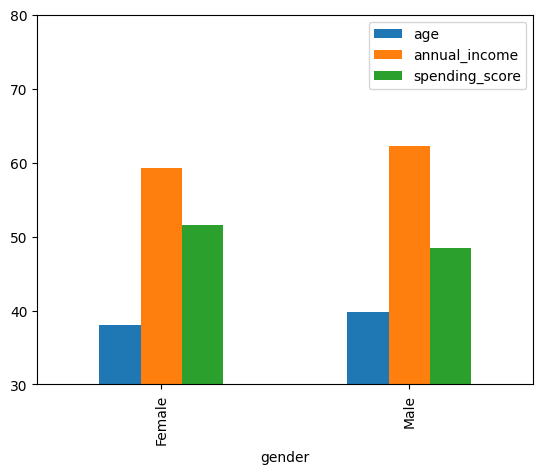

In [ ]:
df.groupby('gender').mean().plot.bar(ylim=(30,80))

<Axes: ylabel='count'>

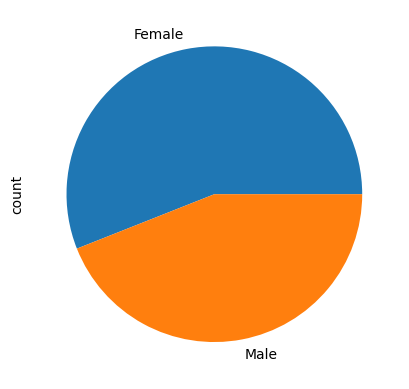

In [ ]:
df['gender'].value_counts().plot.pie()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

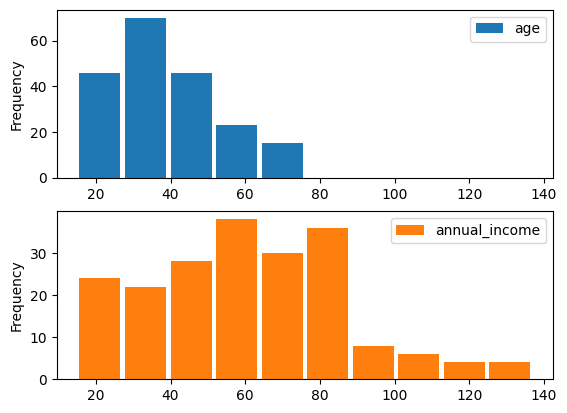

In [ ]:
df[['age','annual_income']].plot.hist(subplots=True,rwidth=0.9,sharex=False)

# Modeling through K-Means.

*   for K-means algorithm we just need numerical columns.
*   To Evaluate the performance of the model we can use **_inertia_ **, the smaller the better.
*   To get the better performance,
  - 1) K-Means needs standardized data, we need to transform our data to be scaled between -1 and +1.
  - 2) We need to find the best K (n_clusters), here we use Elbow Method.
* We can use pipeline to combine the scaling and training phases together.





In [5]:
num_cols=['age','annual_income','spending_score']

In [6]:
scaler=StandardScaler()


Now let's create the column transformer which can apply transformations to specific columns in the dataset. We do this with `make_column_transformer` which takes any number of tuples as arguments. Each tuple contains the transformer to apply to the columns and the identifiers of the columns to transform.

In [7]:
# this applys the scaler to the named columns in order to transform the data to the desired ones.

preprocessor=make_column_transformer((scaler,num_cols))

In [16]:
# Defining pipeline, instead of preprocessing and training separately, we import the wole DataFraame to te pipeline and it scales the data and then trains the model.

kmeans=make_pipeline(preprocessor,KMeans(random_state=0,n_init=10))

In [17]:
kmeans

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'annual_income',
                                                   'spending_score'])])),
                ('kmeans', KMeans(n_init=10, random_state=0))])

# To find the best K , we use "**Elbow Method**"

In [18]:
inertias=[]
k_val=list(range(1,10))  # I test k from 1 through 10
for k in k_val:
  kmeans.set_params(kmeans__n_clusters=k)
  kmeans.fit(df)
  inertias.append(kmeans.named_steps['kmeans'].inertia_)

elbow=figure(title='kmeans best k- elbow',x_axis_label='k',y_axis_label='inertia')
elbow.circle(k_val,inertias)
elbow.line(k_val,inertias)
show(elbow)

# There is a significant decrease in the change of inertia right at $k=4$, so we can say that 4 might be a good number of clusters for our problem.
# We start from $K=$4 , but after visulizing the segments, we will decide to go for $k=$6 which gives us a better segmentation.

In [19]:
optimal_k=6
kmeans.set_params(kmeans__n_clusters=optimal_k)
kmeans.fit(df)
print('inertia:\t\t',kmeans.named_steps['kmeans'].inertia_)

inertia:		 133.88887021131023


In [11]:
kmeans.predict(df)

array([5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

#Now that our model is trained on our data, let's analyze the results. We'll try visualizing the segments which our model has determined by plotting the customers' spending scores and annual incomes.

In [12]:
df['cluster']=kmeans.predict(df)
category=df['cluster'].unique()
category.sort()
palette=Colorblind[len(category)]
income=df['annual_income']
score=df['spending_score']
age=df['age']
p=figure(title='Customer Segments | Annual Income and Spending Score',x_axis_label='Annual_Income',y_axis_label='Spending_Score')
for i,cat in enumerate(category):
  indices = df['cluster'] == cat
  p.scatter(income[indices],score[indices],color=palette[i],legend_label=('segment '+str(cat)))
show(p)

- **Segments 0 and 1**: these are the average customers; they don't overspend or underspend, and they make neither lots nor little money.
- **Segment 5**: these are the customers who, despite a low income, spend above average amounts of money. This could indicate a segment of impulse buyers.
- **Segment 2**: these are the customers who make and spend lots of money. This could indicate a segment of customers who are partial to luxury goods and have the means to buy them.
- **Segment 4**: these are the customers with low incomes and spending. A customer within this segment is likely to be a conservative buyer who will only go for the essentials.
- **Segment 3**: these are the customers who spend little despite a high income. These are likely conservative buyers, however they may be inclined to splurge occasionally as they have the means.